In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.shape


(79649, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79649 entries, 0 to 79648
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      79649 non-null  object 
 1   BMI               79649 non-null  float64
 2   Smoking           79649 non-null  object 
 3   AlcoholDrinking   79649 non-null  object 
 4   Stroke            79649 non-null  object 
 5   PhysicalHealth    79649 non-null  float64
 6   MentalHealth      79649 non-null  float64
 7   DiffWalking       79649 non-null  object 
 8   Sex               79649 non-null  object 
 9   AgeCategory       79649 non-null  object 
 10  Race              79648 non-null  object 
 11  Diabetic          79648 non-null  object 
 12  PhysicalActivity  79648 non-null  object 
 13  GenHealth         79648 non-null  object 
 14  SleepTime         79648 non-null  float64
 15  Asthma            79648 non-null  object 
 16  KidneyDisease     79648 non-null  object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,79649.0,28.039617,6.305959,12.02,23.71,27.07,31.18,87.05
PhysicalHealth,79649.0,3.503233,8.077658,0.00,0.00,0.00,2.00,30.00
MentalHealth,79649.0,3.911060,7.961556,0.00,0.00,0.00,3.00,30.00
SleepTime,79648.0,7.101823,1.497506,1.00,6.00,7.00,8.00,24.00


In [11]:
df.describe(include = 'O').T

,count,unique,top,freq
HeartDisease,79649,2,No,72800
Smoking,79649,2,No,46487
AlcoholDrinking,79649,2,No,74198
Stroke,79649,2,No,76478
DiffWalking,79649,2,No,68142
Sex,79649,2,Female,42038
AgeCategory,79649,14,65-69,8328
Race,79648,6,White,55440
Diabetic,79648,4,No,66759
PhysicalActivity,79648,2,Yes,61623


In [13]:
df.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic', nan], dtype=object)

In [15]:
df.isnull().sum()/len(df)*100

HeartDisease        0.000000
BMI                 0.000000
Smoking             0.000000
AlcoholDrinking     0.000000
Stroke              0.000000
PhysicalHealth      0.000000
MentalHealth        0.000000
DiffWalking         0.000000
Sex                 0.000000
AgeCategory         0.000000
Race                0.001256
Diabetic            0.001256
PhysicalActivity    0.001256
GenHealth           0.001256
SleepTime           0.001256
Asthma              0.001256
KidneyDisease       0.001256
SkinCancer          0.001256
dtype: float64

In [18]:
len(df[df.duplicated()])

1208

In [20]:
df.drop_duplicates(inplace=True)
len(df[df.duplicated()])

0

In [21]:
df['HeartDisease'].value_counts()/len(df)*100

No     91.272421
Yes     8.727579
Name: HeartDisease, dtype: float64

<Axes: ylabel='HeartDisease'>

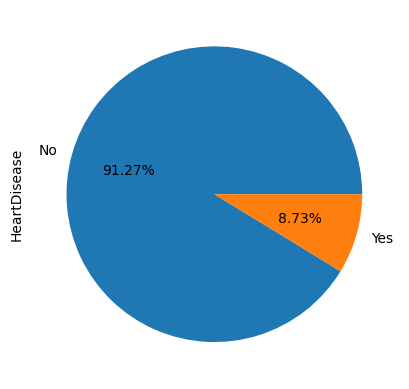

In [22]:
df['HeartDisease'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

In [23]:
categorical_features = df.select_dtypes(include =[np.object_])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

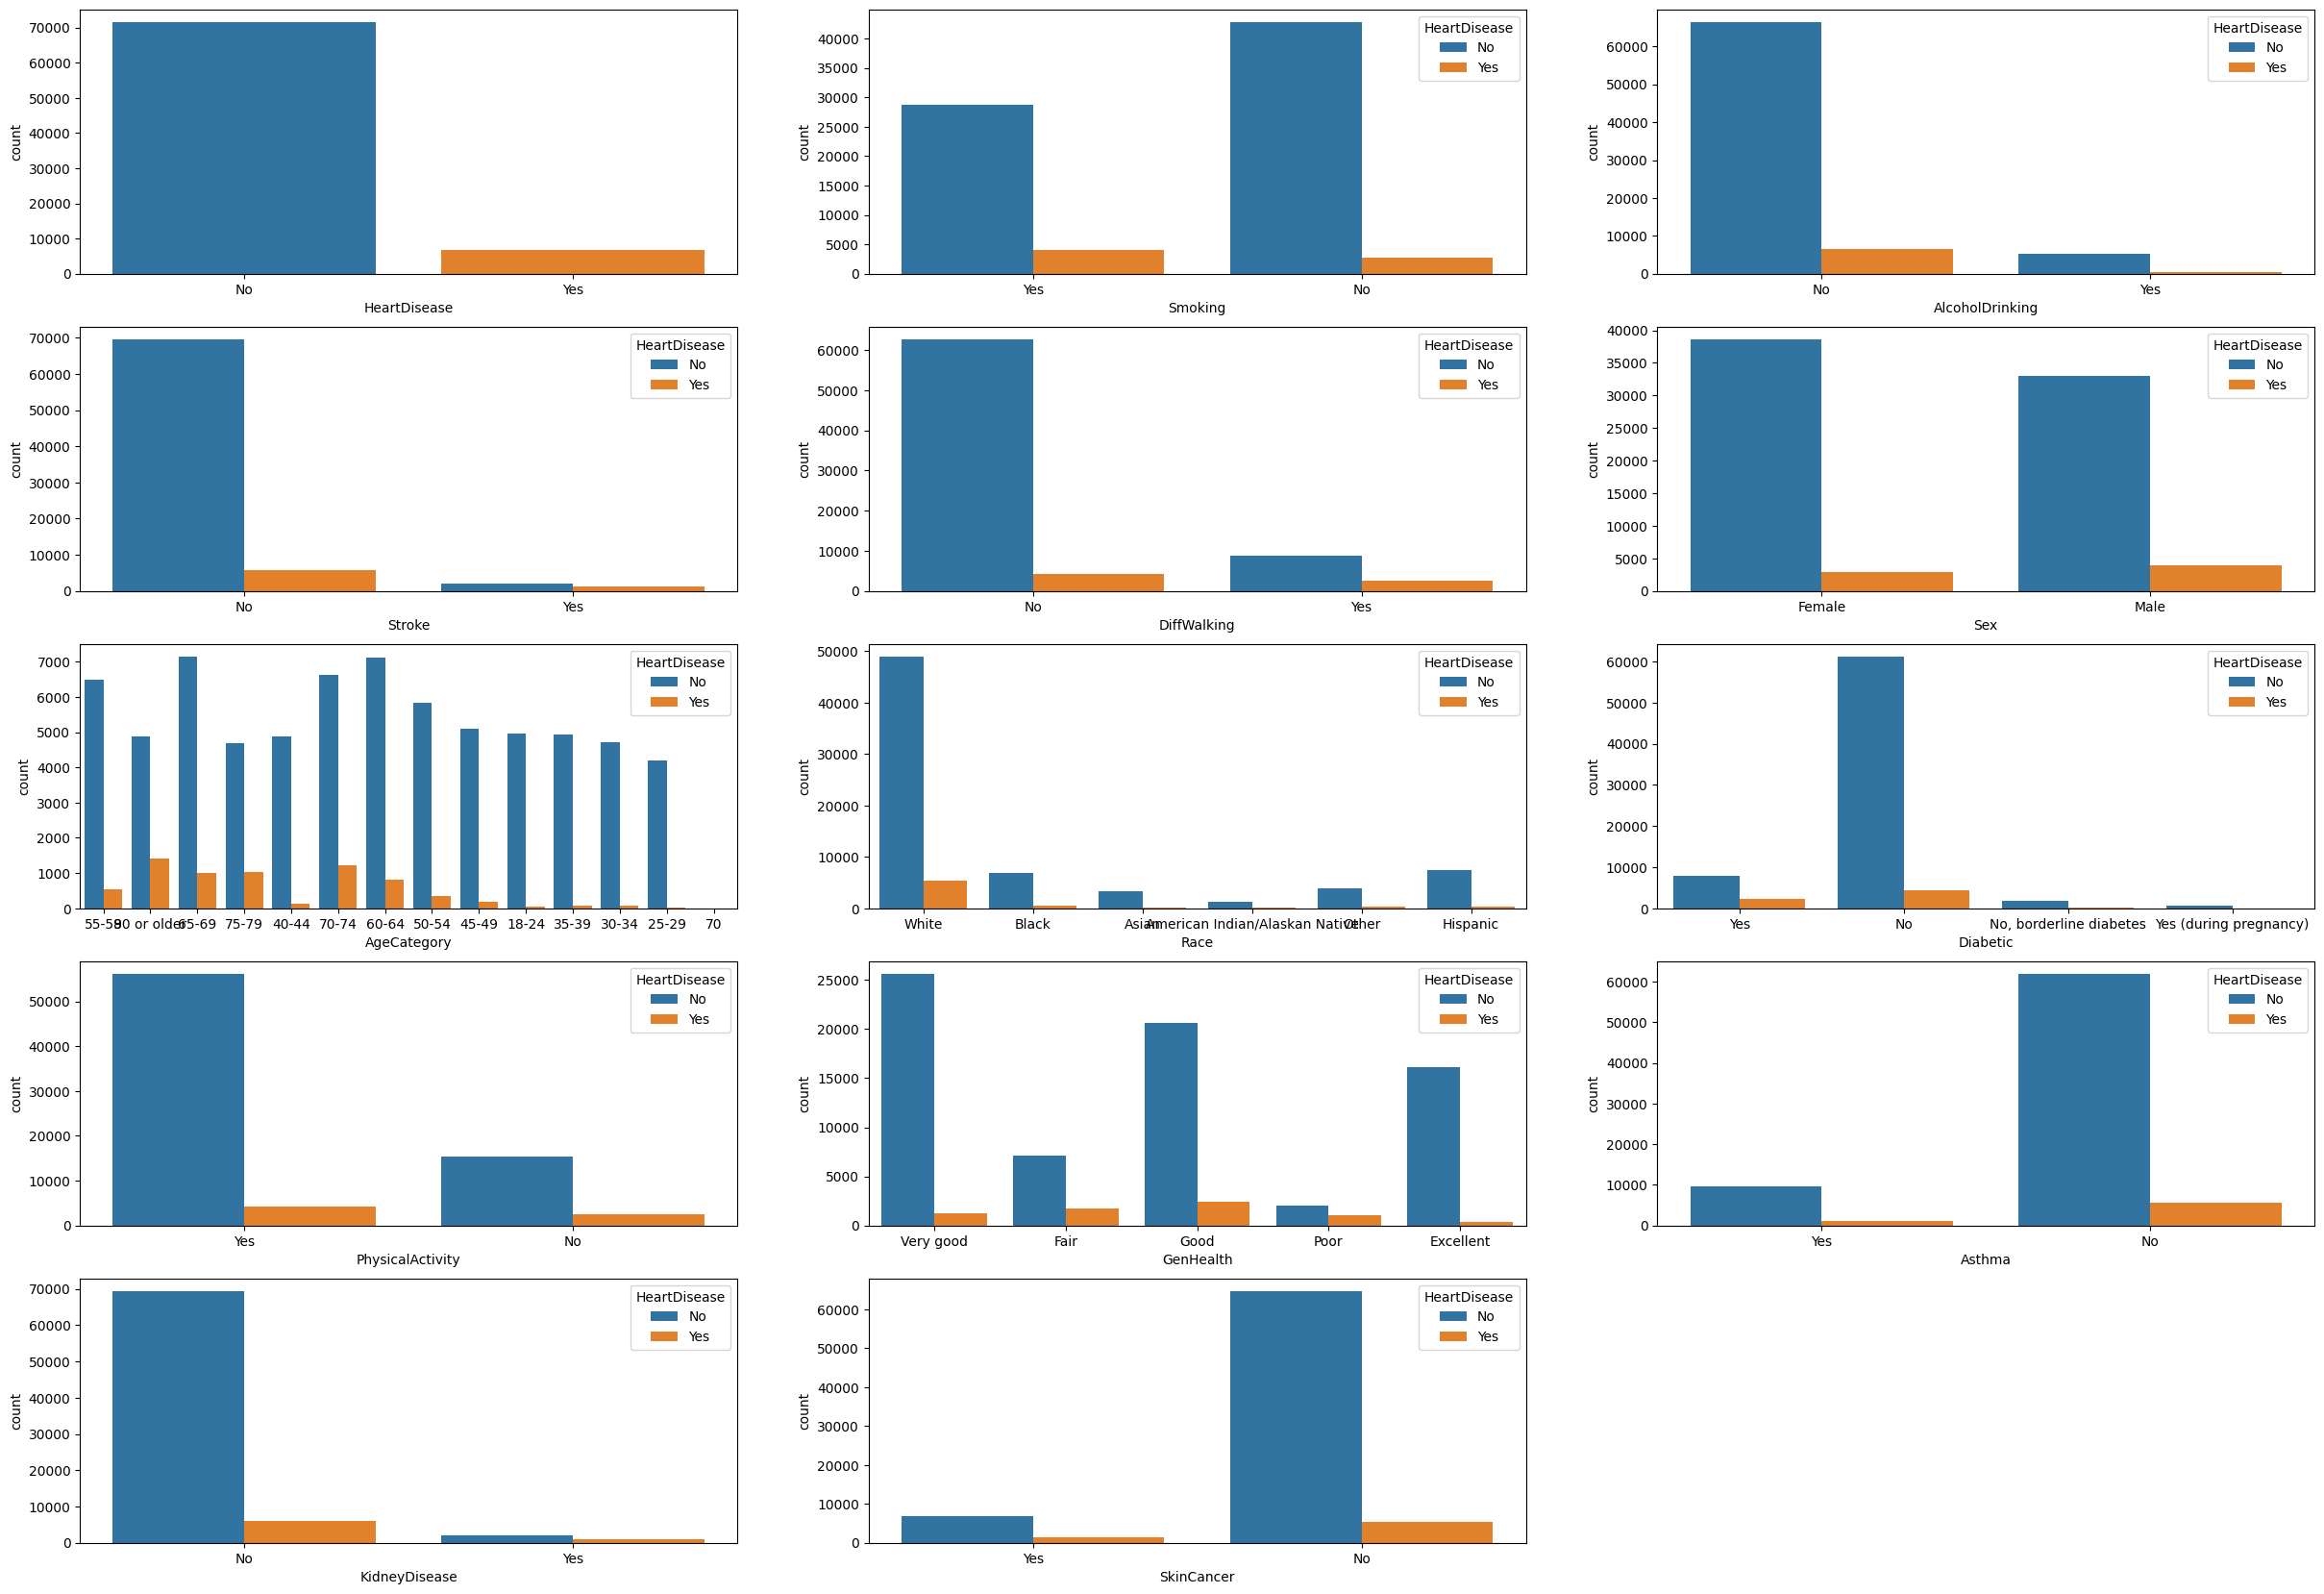

In [24]:
i = 1
plt.figure(figsize=(30,25))

for feature in categorical_features:
  plt.subplot(6,3,i)
  sns.countplot(x = feature, hue = 'HeartDisease', data = df)
  i+=1

In [25]:
df.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)',
       nan], dtype=object)

In [26]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

In [27]:
df['Diabetic'].value_counts()

No     67666
Yes    10774
Name: Diabetic, dtype: int64

In [28]:
df.Diabetic.unique()

array(['Yes', 'No', nan], dtype=object)

In [31]:
df.HeartDisease.unique()

array([2, 1])

In [30]:
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1,'No':2})

In [32]:
df.HeartDisease.unique()

array([2, 1])

In [34]:


object_type_variable = [i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i] == object]
print(object_type_variable)

le = LabelEncoder()

def encoder(df):
    for i in object_type_variable:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)

encoder(df)


['AgeCategory', 'Race', 'GenHealth']


In [36]:
df = pd.get_dummies(df,drop_first=True)
df.head(2)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,2,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,2,20.34,0.0,0.0,13,5,4,7.0,0,0,1,0,0,0,1,0,0,0


In [38]:
X = df.drop('HeartDisease',axis =1)
y= df['HeartDisease']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(62752, 17) (15689, 17)
(62752,) (15689,)


In [44]:
ss = StandardScaler()
X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.fit_transform(X_test.iloc[:,:7])

In [45]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
3496,-0.097919,-0.437526,0.749597,-0.465426,-0.150035,1.186575,0.592857,0,0,0,0,0,0,1,1,0,0
12926,-1.144256,-0.437526,0.749597,0.300698,0.591772,-1.433916,0.592857,0,1,0,0,0,0,1,0,0,1
5044,-1.216743,-0.437526,-0.496240,0.300698,0.591772,-1.433916,-0.727992,1,0,0,0,1,0,0,0,0,0
25769,-0.531267,-0.437526,-0.496240,1.577571,0.591772,1.186575,0.592857,1,0,0,0,0,0,1,0,0,0
63279,0.176271,-0.437526,-0.496240,-1.231550,0.591772,-0.123671,-0.067567,1,1,0,0,0,0,1,0,0,0


In [64]:
logreg_model = LogisticRegression()
Knn_model = KNeighborsClassifier()
nb_model =GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gradboost_model = GradientBoostingClassifier()

In [55]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)




In [56]:
Knn_model.fit(X_train_imputed, y_train)


KNeighborsClassifier()

In [57]:
logreg_model.fit(X_train_imputed, y_train)


LogisticRegression()

In [65]:
nb_model.fit(X_train_imputed, y_train)


GaussianNB()

In [59]:
dt_model.fit(X_train_imputed, y_train)


DecisionTreeClassifier()

In [60]:
rf_model.fit(X_train_imputed, y_train)


RandomForestClassifier()

In [61]:
adaboost_model.fit(X_train_imputed, y_train)


AdaBoostClassifier()

In [62]:
gradboost_model.fit(X_train_imputed, y_train)

GradientBoostingClassifier()

In [75]:
logreg_model.fit(X_train_imputed, y_train)
logreg_preds = logreg_model.predict(X_test)

Knn_model.fit(X_train_imputed, y_train)
knn_preds  = Knn_model.predict(X_test)

nb_preds = nb_model.predict(X_test)

dt_model.fit(X_train_imputed, y_train)
dt_preds = dt_model.predict(X_test)
rf_model.fit(X_train_imputed, y_train)
rf_preds = rf_model.predict(X_test)
adaboost_model.fit(X_train_imputed, y_train)
adaboost_preds = adaboost_model.predict(X_test)
gradboost_model.fit(X_train_imputed, y_train)
gradboost_preds = gradboost_model.predict(X_test)

In [77]:
print('LogisticRegression', round(accuracy_score(y_test, logreg_preds),3))
print('Knn', round(accuracy_score(y_test, knn_preds),3))
print('Naive Bayes', round(accuracy_score(y_test, nb_preds),3))
print('Decission Tree', round(accuracy_score(y_test, dt_preds),3))
print('Random Forest', round(accuracy_score(y_test, rf_preds),3))
print('Adaboost', round(accuracy_score(y_test, adaboost_preds),3))
print('Gradient Boost', round(accuracy_score(y_test, gradboost_preds),3))

LogisticRegression 0.915
Knn 0.903
Naive Bayes 0.847
Decission Tree 0.86
Random Forest 0.909
Adaboost 0.916
Gradient Boost 0.916


In [82]:


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


stacked_model = StackingClassifier(estimators=[
    ('Logreg', logreg_model),
    ('Knn', Knn_model),
    ('Naive Bayes', nb_model),
    ('Decission Tree', dt_model),
    ('Random Forest', rf_model),
    ('Adaboost', adaboost_model),
    ('Gradient Boost', gradboost_model),
], final_estimator=LogisticRegression())
stacked_model.fit(X_train_imputed, y_train)

# Make predictions
stacked_preds = stacked_model.predict(X_test_imputed)

# Evaluate the model
print('Stacked Model accuracy:', accuracy_score(y_test, stacked_preds))


Stacked Model accuracy: 0.9145898400152973
